# **Demo on single-shot multi-band EPI reconstruction**

### Authors:

  * Zhengguo Tan <zhengguo.tan@gmail.com>

# 1. Setup

## Install SigPy

  * The original [SigPy](https://github.com/mikgroup/sigpy.git) was forked for the development of HD-MRI reconstruction and is available here: https://github.com/ZhengguoTan/sigpy.git

In [1]:
!git clone https://github.com/ZhengguoTan/NAViEPI.git

Cloning into 'NAViEPI'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 115 (delta 52), reused 87 (delta 28), pack-reused 0
Receiving objects: 100% (115/115), 14.22 MiB | 10.00 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [2]:
!git clone https://github.com/ZhengguoTan/sigpy.git

Cloning into 'sigpy'...
remote: Enumerating objects: 6447, done.
remote: Counting objects: 100% (1400/1400), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 6447 (delta 1282), reused 1254 (delta 1237), pack-reused 5047
Receiving objects: 100% (6447/6447), 3.78 MiB | 14.95 MiB/s, done.
Resolving deltas: 100% (4750/4750), done.


In [3]:
%cd /content/sigpy
!git log -1

/content/sigpy
commit 6057d19c28e88e642c2ea7dc9b72a61595781f0a (HEAD -> master, origin/master, origin/HEAD)
Author: Zhengguo Tan <zhengguo.tan@gmail.com>
Date:   Tue Dec 19 09:19:35 2023 +0100

    specify python 3.10 version


In [4]:
!pip install -e /content/sigpy

Obtaining file:///content/sigpy
  Preparing metadata (setup.py) ... done
  Running setup.py develop for sigpy


# 2. Load Data

In [5]:
!python /content/NAViEPI/data/load.py --file "1.7x1.7x4.0mm_R2x3_kdat.h5 1.7x1.7x4.0mm_R2x3_refs.h5"

> user provided file:  1.7x1.7x4.0mm_R2x3_kdat.h5 1.7x1.7x4.0mm_R2x3_refs.h5
1.7x1.7x4.0mm_R2x3_kdat.h5: OK
1.7x1.7x4.0mm_R2x3_refs.h5: OK


# 3. Multi-Band Single-Shot EPI SENSE Reconstruction

In [6]:
!python /content/NAViEPI/scripts/MbSenseRecon.py

> run the multi-band SENSE recon on a single-shot EPI data
> data directory:  /content/NAViEPI/data
> run on device:  <CUDA Device 0>
> acceleration factor: 2 (in-plane) x 3 (slice)
> kdat shape:  (12, 1, 16, 1, 130, 130)
> estimating coils using ESPiRIT: 
  000
  001
  002
> mps shape:  (16, 3, 130, 130)
 > sms: yshift  [0.0, 0.5, 1.0]
  MR Forward Operator Input Shape:  [1, 3, 130, 130]
  MR Forward Operator Output Shape:  [1, 16, 1, 130, 130]
  cg iter:  0; resid:      0.005684; norm:      0.021139
  cg iter:  1; resid:      0.003303; norm:      0.024143
  cg iter:  2; resid:      0.001769; norm:      0.026455
  cg iter:  3; resid:      0.001066; norm:      0.027437
  cg iter:  4; resid:      0.000764; norm:      0.028019
  cg iter:  5; resid:      0.000550; norm:      0.028453
  cg iter:  6; resid:      0.000465; norm:      0.028781
  cg iter:  7; resid:      0.000328; norm:      0.029072
  cg iter:  8; resid:      0.000292; norm:      0.029244
  cg iter:  9; resid:      0.000193; 

# 4. Display Results

## Zero-Filled Reconstruction

(1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 130, 16, 130)
(12, 16, 130, 130)


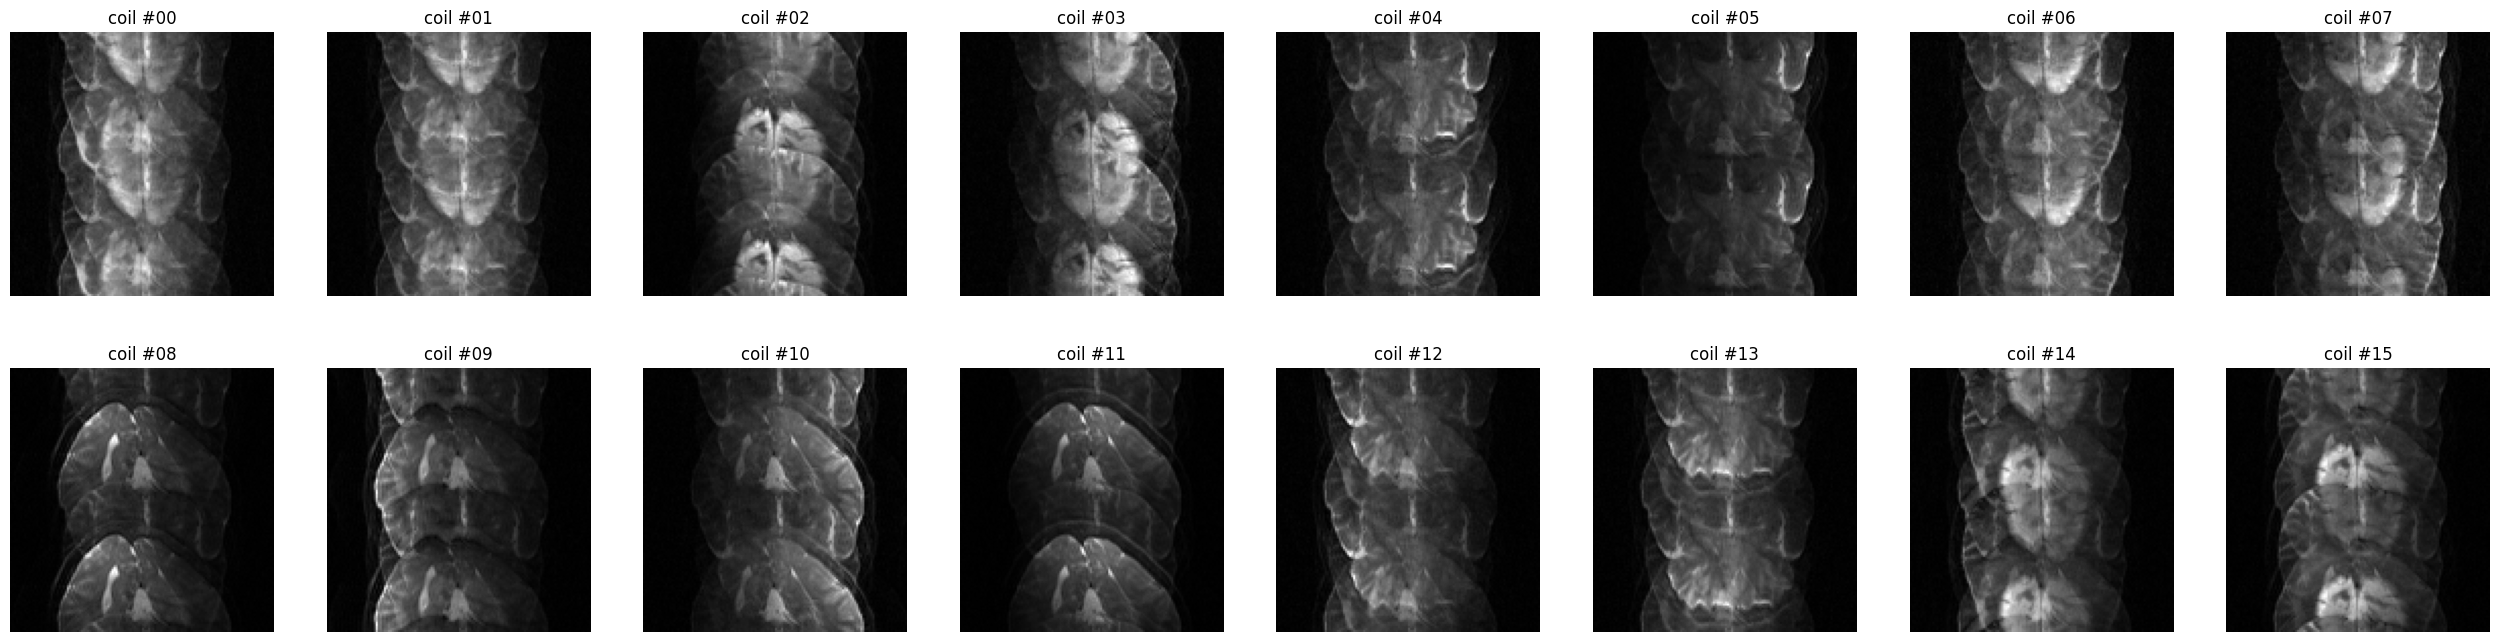

In [11]:
import h5py

import matplotlib.pyplot as plt
import numpy as np
import sigpy as sp

f = h5py.File('/content/NAViEPI/data/1.7x1.7x4.0mm_R2x3_kdat.h5', 'r')
kdat = f['kdat'][:]
print(kdat.shape)
f.close()

kdat_prep = np.squeeze(kdat)
kdat_prep = np.transpose(kdat_prep, (0, 2, 1, 3))
print(kdat_prep.shape)

N_diff, N_c, N_y, N_x = kdat_prep.shape

zf = sp.ifft(kdat_prep, axes=(-2, -1))

fig, ax = plt.subplots(2, 8, figsize=(32, 8))

for n in range(N_c):

  r = int(n // 8)
  c = int(n  % 8)

  ax[r][c].imshow(abs(zf[0, n]), cmap='gray')
  ax[r][c].set_title('coil #' + str(n).zfill(2))
  ax[r][c].set_axis_off()

plt.show()

## MB-SENSE Reconstruction

(12, 1, 3, 130, 130)


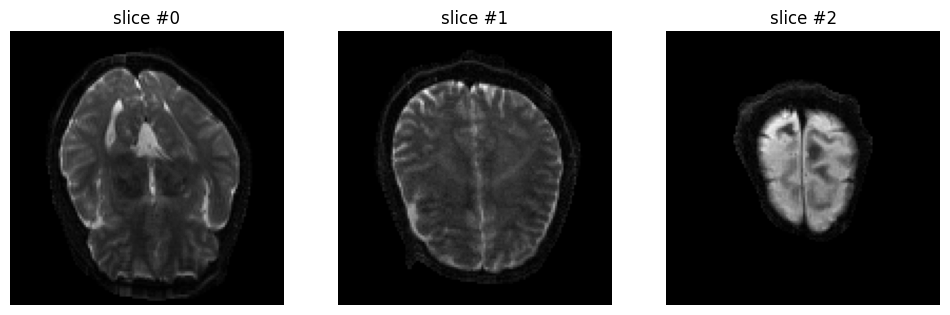

In [13]:
f = h5py.File('/content/NAViEPI/data/1.7x1.7x4.0mm_R2x3_MbSense.h5', 'r')
R = f['R'][:]
print(R.shape)
f.close()

N_z = R.shape[-3]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for z in range(N_z):
  ax[z].imshow(abs(R[0, 0, z]), cmap='gray')
  ax[z].set_title('slice #' + str(z))
  ax[z].set_axis_off()

plt.show()

# **Thank You for Your Attention!**